# Tips Plotting

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### On which days do people give the most tips?

Text(0.5, 0, "dict_keys(['Sun', 'Sat', 'Thur', 'Fri'])")

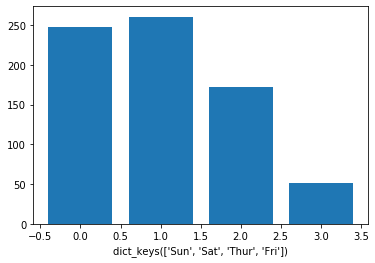

In [87]:
days = df["day"].unique()

tip_sum = {}
for d in days:
    day_1 = df[df["day"]==d]
    tip_s = day_1["tip"].sum()
    tip_sum[d]=tip_s

plt.bar(range(len(tip_sum)), list(tip_sum.values()))

plt.xlabel(tip_sum.keys())
    



An alternative solution with groupby method:

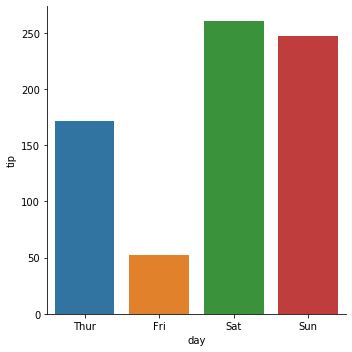

In [89]:
df_day = pd.DataFrame(df.groupby(by = "day")["tip"].sum())
df_day.reset_index(inplace=True)
df_day
sns.catplot(x= "day", y ="tip", data =df_day, kind="bar")

### Are there any correlations in the data ?

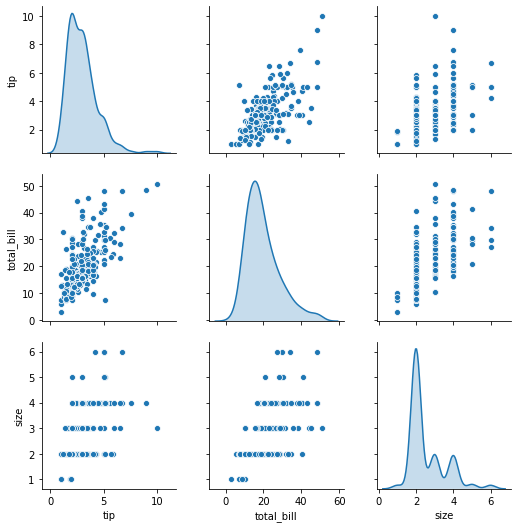

In [60]:
data = df[['tip', "total_bill","size"]]
sns.pairplot(data, diag_kind="kde", kind="scatter", palette="husl")


### What factors influence the tip size most?

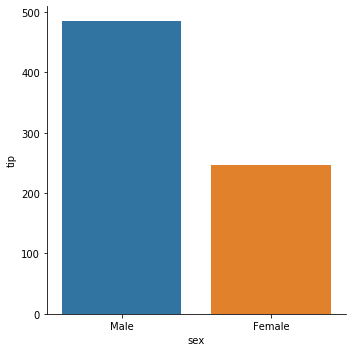

In [80]:
df_sex = pd.DataFrame(df.groupby(by = "sex")["tip"].sum())
df_sex.reset_index(inplace=True)
df_sex
sns.catplot(x= "sex", y ="tip", data =df_sex, kind="bar")

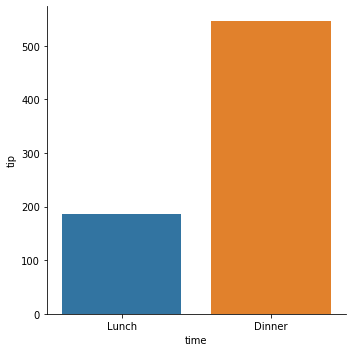

In [82]:
df_time = pd.DataFrame(df.groupby(by = "time")["tip"].sum())
df_time.reset_index(inplace=True)

sns.catplot(x= "time", y ="tip", data =df_time, kind="bar")

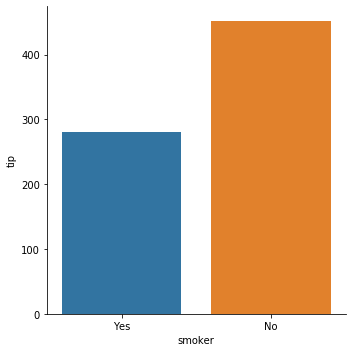

In [85]:
df_smoke = pd.DataFrame(df.groupby(by = "smoker")["tip"].sum())
df_smoke.reset_index(inplace=True)

sns.catplot(x= "smoker", y ="tip", data =df_smoke, kind="bar")

## Conclucion

More tips are given on Saturdays and Sundays by no smoker males on dinner time. The total amount of tips have correlation with the amount of bills, if the total bill increases the tips also increase. In addition, group size of 3 and 4 give more tips than smaller and bigger groups.

